# Data Science Lab
Our project is to extract information and value from this dataset regarding some services offered by a well-known company dealing with telephony,internet, etc.

We will try to predict which customer will or will not abandon a certain service and it is a problem that can be solved through binary classification with Machine Learning models.

As first we merge the datasets through command prompts and load the dataset.

To merge the datasets we used cdm for convenience using the following commands:

// Unzip files

```
bunzip2 part-0*.bz2
bunzip2 part-1*.bz2
bunzip2 part-2*.bz2
bunzip2 part-3*.bz2

```


// Remove first line of each csv file (header) except for first file
```
mv part-00000-a291a4b5-694f-474b-a53d-944b00bb34ee.csv ../ 
sed -i '' 1d part-0*.csv
sed -i '' 1d part-1*.csv
sed -i '' 1d part-2*.csv
sed -i '' 1d part-3*.csv
mv part-00000-a291a4b5-694f-474b-a53d-944b00bb34ee.csv anti-churn/
```

// merge files
```
cat part-0*.csv > 0.csv
cat part-1*.csv > 1.csv
cat part-2*.csv > 2.csv
cat part-3*.csv > 3.csv
```

// Create an unique file
```
Cat 0.csv 1.csv 2.csv 3.csv > complete.csv
```

## Preliminary Operations

In [1]:
!pip install xgboost
!pip install frozendict
!pip install -U -q fcapy==0.1.3
!pip install bitsets
!pip install imblearn

In [2]:
!pip install imblearn

In [3]:
import pandas as pd
from fcapy.context import FormalContext
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
#from boruta import BorutaPy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import imblearn
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, NeighbourhoodCleaningRule 
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

In [4]:
data = pd.read_csv(r'C:\Users\Simone\Documents\Desktop\Università-Bicocca\DS LAB-28\df_project\complete.csv', sep= ",")
data.head()

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,...,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
0,05c36523ead36d29924d69e0d34a587f1be95089eeb3deb2,110,9,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
1,208684b1148590745983ae01b5ec3189be03e60a78caed2e,17,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,2017-06-18
2,2bf4058a60bb97c372259cba8a71005c9a07224ec2dc5893,3,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,2017-05-07
3,54de0fb755b15f1b931d7c72390276b4f8c4b0314ea36956,196,25,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-08-06
4,5f52f7ee7f469a3b4a407d3ab1c85dff9ad3d36afc22dc69,3,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07


# Data exploration e Pre-processing
We are going to do an exploratory analysis of the dataset, to better understand the data, to fit and pre-process them to best suit our classification.





In [5]:
doppioni = data[data.duplicated(subset='external_id', keep=False)] #tutte le righe che si presentano almeno una volta
doppioni

,external_id,how_many_ok_urls,how_many_ko_urls,os_android,os_bsd,os_ios,os_linux,os_osx,os_other,os_windows,...,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc,DATA_RIF
12,48c1265efef5c07435d6be3482c34ea916a3cc62e0704f2c,31,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2017-08-06
13,48c1265efef5c07435d6be3482c34ea916a3cc62e0704f2c,31,0,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-08-06
80,ca30c2a67990e6f04ee7a382424a9544a39c1b1f7d0ba77a,854,4,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07
81,ca30c2a67990e6f04ee7a382424a9544a39c1b1f7d0ba77a,854,4,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,2017-05-07
135,b7485750f528c882be15687c1d5333a1b7b415d7851c830c,149,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,2017-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330411,20f47d9d86780f959fce8b16b849940e93e0832e9d565cbd,221,169,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2017-05-07
330536,dcc17b4841567181a44373f773992534e2abdaf25c7722f1,19,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,2017-05-07
330537,dcc17b4841567181a44373f773992534e2abdaf25c7722f1,19,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,2017-05-07
330551,a4ef2bb3bb2eff3e4c83e7611f1bf1ee9c99ced47000c994,491,6,0,0,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,2017-05-07


In [6]:
duplicati = doppioni.groupby(['external_id'], as_index=False).describe()
duplicati

how_many_ok_urls                                                 \
                count   mean  std    min    25%    50%    75%    max   
0                 2.0   11.0  0.0   11.0   11.0   11.0   11.0   11.0   
1                 2.0  161.0  0.0  161.0  161.0  161.0  161.0  161.0   
2                 2.0   16.0  0.0   16.0   16.0   16.0   16.0   16.0   
3                 2.0    2.0  0.0    2.0    2.0    2.0    2.0    2.0   
4                 2.0  103.0  0.0  103.0  103.0  103.0  103.0  103.0   
...               ...    ...  ...    ...    ...    ...    ...    ...   
4084              2.0   43.0  0.0   43.0   43.0   43.0   43.0   43.0   
4085              2.0   13.0  0.0   13.0   13.0   13.0   13.0   13.0   
4086              2.0  130.0  0.0  130.0  130.0  130.0  130.0  130.0   
4087              2.0  111.0  0.0  111.0  111.0  111.0  111.0  111.0   
4088              2.0   11.0  0.0   11.0   11.0   11.0   11.0   11.0   

     how_many_ko_urls         ... STB_SD      Pdisc                           \
                count   mean  ...    75%  max count mean  std  min  25%  50%   
0                 2.0    0.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
1                 2.0  102.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
2                 2.0   17.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
3                 2.0    0.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
4                 2.0   40.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
...               ...    ...  ...    ...  ...   ...  ...  ...  ...  ...  ...   
4084              2.0    2.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
4085              2.0    0.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
4086              2.0   45.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
4087              2.0   32.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   
4088              2.0    2.0  ...    0.0  0.0   2.0  0.0  0.0  0.0  0.0  0.0   

                
      75%  max  
0     0.0  0.0  
1     0.0  0.0  
2     0.0  0.0  
3     0.0  0.0  
4     0.0  0.0  
...   ...  ...  
4084  0.0  0.0  
4085  0.0  0.0  
4086  0.0  0.0  
4087  0.0  0.0  
4088  0.0  0.0  

[4089 rows x 800 columns]

In [7]:
data.duplicated(subset='external_id', keep=False) #denoting duplicate rows, mark duplicates as 'true'
duplicate_rows_data = data[data.duplicated(subset='external_id')] 
duplicate_rows_data.shape
#4172 duplicated rows over 330586 total observations
data = data.drop_duplicates(subset='external_id') #new dataset
data.shape #326414 new number of observations

(326414, 102)

We eliminated duplicates for IDs because they represent the same users.

In [8]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326414 entries, 0 to 330585
Columns: 102 entries, external_id to DATA_RIF
dtypes: float64(67), int64(33), object(2)
memory usage: 256.5+ MB


external_id         0
how_many_ok_urls    0
how_many_ko_urls    0
os_android          0
os_bsd              0
                   ..
STB_MYSKYHD         0
STB_MYSKY           0
STB_SD              0
Pdisc               0
DATA_RIF            0
Length: 102, dtype: int64

In [9]:
data = data.loc[:, (data != 0).any(axis=0)] #Delete all columns with only 0.
#First I see what columns I have and try to interpret their meaning.
for columns in data:
  print(columns)

external_id
how_many_ok_urls
how_many_ko_urls
os_android
os_ios
os_linux
os_other
os_windows
browser_chrome
browser_firefox
browser_opera
browser_other
browser_safari
browser_unknown
feriale_morning
feriale_afternoon
feriale_evening
feriale_night
weekend_morning
weekend_afternoon
weekend_evening
weekend_night
L00_50
L51_100
L101_250
L251_500
L501_1000
L1001_2500
L2501_5000
L5001_10000
L10001_more
categories_artandentertainment
categories_automotive
categories_business
categories_careers
categories_education
categories_familyandparenting
categories_finance
categories_foodanddrink
categories_healthandfitness
categories_hobbiesandinterests
categories_homeandgarden
categories_intentions
categories_lawgovtandpolitics
categories_news
categories_pets
categories_realestate
categories_religionandspirituality
categories_science
categories_shopping
categories_society
categories_sports
categories_styleandfashion
categories_technologyandcomputing
categories_travel
categories_uncategorized
CINEMA
CA

So let's try to understand their characteristics with the describe() function. 
* The vairables how_many_ok_urls,how_many_ko_urls are integers.
* The variables os_android, etc. are dummy(0 or 1).
* Browser variables are dummy ( 0 or 1).
* The categories variables result are percentages.
* The variable y, to prevdere is Pdisc.
--------------------------------------------------------------------------------
Variable description:
- how_many_ok_urls: the number of sites that the semantic engine was able to analyze.
- how_many_ko_urls: the number of sites that the semantic engine failed to parse.
- external_id: user identifier, should be unique and if there are duplicates we need to group the observations together..
- os_android: operating system of the browser used.
- browser_android: the browser.
- navigation_monday.00_30: the day and time of navigation and there are 30 min slots.
- L51_100: length of text present in web pages (the sum of the values per line from L51_100 to L10001_more should make 1).
- categories_artandentertainment: category to which the website belongs
- admants_16: ad hoc semantic categories.
- Pdisc: target variable and pertains to users who have unsubscribed.
- DATA_RIF: date of observation detection (to be deleted).



Now let's look at the correlations

In [10]:
data = data.drop('external_id', axis=1)
data = data.drop('DATA_RIF', axis=1)#elimino la colonna external_id perchè non ci serve


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326414 entries, 0 to 330585
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   how_many_ok_urls                    326414 non-null  int64  
 1   how_many_ko_urls                    326414 non-null  int64  
 2   os_android                          326414 non-null  int64  
 3   os_ios                              326414 non-null  int64  
 4   os_linux                            326414 non-null  int64  
 5   os_other                            326414 non-null  int64  
 6   os_windows                          326414 non-null  int64  
 7   browser_chrome                      326414 non-null  int64  
 8   browser_firefox                     326414 non-null  int64  
 9   browser_opera                       326414 non-null  int64  
 10  browser_other                       326414 non-null  int64  
 11  browser_safari            

<AxesSubplot:>

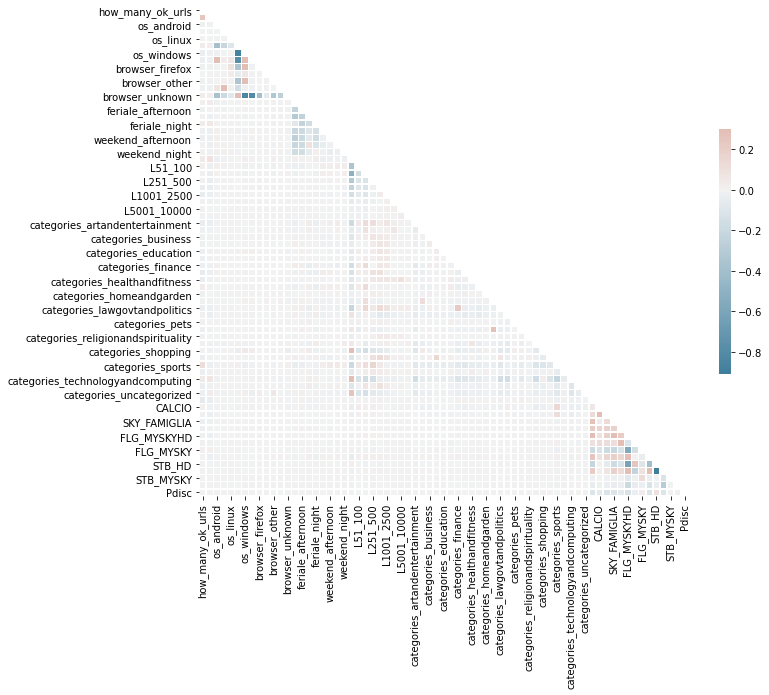

In [12]:
#After understanding what the columns represent,let's go on to analyze how the data are distributed.
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Correlazioni elevate:
*   os_windows/os_others : -0.89
*   os_others/browser crhome: -0.79
*   os_others/browser_unknow: 0.95
*   browser_unknow/os_windows: -0.

Some variables might cause multicollinearity problems later we will decide whether to eliminate some columns or not,feature selection will help us.

<AxesSubplot:xlabel='Pdisc', ylabel='count'>

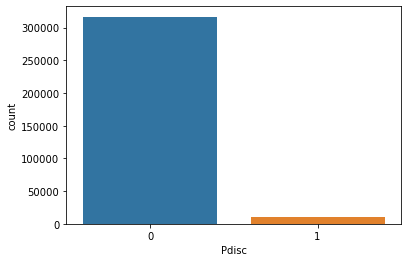

In [13]:
sns.countplot(x="Pdisc", data=data)

<AxesSubplot:xlabel='os_ios', ylabel='count'>

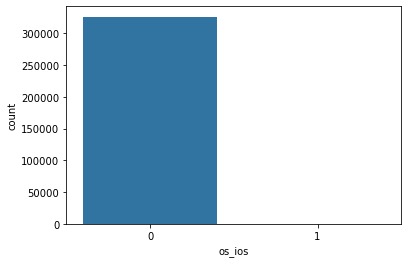

In [14]:
sns.countplot(x="os_ios", data=data)

As we expected the class to be predicted is unbalanced


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326414 entries, 0 to 330585
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   how_many_ok_urls                    326414 non-null  int64  
 1   how_many_ko_urls                    326414 non-null  int64  
 2   os_android                          326414 non-null  int64  
 3   os_ios                              326414 non-null  int64  
 4   os_linux                            326414 non-null  int64  
 5   os_other                            326414 non-null  int64  
 6   os_windows                          326414 non-null  int64  
 7   browser_chrome                      326414 non-null  int64  
 8   browser_firefox                     326414 non-null  int64  
 9   browser_opera                       326414 non-null  int64  
 10  browser_other                       326414 non-null  int64  
 11  browser_safari            

# FCA analysis
Formal concept analysis (FCA) is a principled method for deriving a hierarchy of concepts or a formal ontology from a collection of objects and their properties. Each concept in the hierarchy represents objects that share a certain set of properties; and each subconcept in the hierarchy represents a subset of the objects (as well as a superset of the properties) of the concepts that precede it.

In [16]:
dicotomic = data[['os_android',
'os_ios',
'os_linux',
'os_other',
'os_windows',
'browser_chrome',
'browser_firefox',
'browser_opera',
'browser_other',
'browser_safari',
'browser_unknown',
'CINEMA',
'CALCIO',
'SPORT',
'SKY_FAMIGLIA',
'FLG_MV',
'FLG_MYSKYHD',
'FLG_HD',
'FLG_MYSKY',
'FLG_SKY_ON_DEMAND',
'STB_HD',
'STB_MYSKYHD',
'STB_MYSKY',
'STB_SD',
'Pdisc',
]]
dicotomic.head()

,os_android,os_ios,os_linux,os_other,os_windows,browser_chrome,browser_firefox,browser_opera,browser_other,browser_safari,...,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc
0,0,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [17]:
#Trasformo 0 e 1 in booleani
dicotomic = dicotomic.iloc[1:, :]
dicotomic1 =dicotomic.astype('bool')
dicotomic1

,os_android,os_ios,os_linux,os_other,os_windows,browser_chrome,browser_firefox,browser_opera,browser_other,browser_safari,...,FLG_MV,FLG_MYSKYHD,FLG_HD,FLG_MYSKY,FLG_SKY_ON_DEMAND,STB_HD,STB_MYSKYHD,STB_MYSKY,STB_SD,Pdisc
1,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330581,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
330582,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
330583,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
330584,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False


In [18]:
#K = FormalContext.read_csv('/content/dicotomic4')
#print(K)

In [19]:
#from fcapy.lattice import ConceptLattice
#L = ConceptLattice.from_context(K)
#print(len(L))

In [20]:
#from fcapy.visualizer import ConceptLatticeVisualizer

#plt.figure(figsize=(10, 5))
#vsl = ConceptLatticeVisualizer(L)
#vsl.draw_networkx(max_new_extent_count=5, draw_node_indices=True)
#plt.xlim(-0.7,0.7)
#plt.axis(False)
#plt.tight_layout()
#plt.show()

Because of the computational limitation of our instruments and because of the size of the dataset, FCA was performed using random and stratified sampling.
The results can be observed in the report

# Normalizzazione
Normalization is a technique often applied as part of data preparation for Machine Learning. The goal of normalization is to change the values of numerical columns in the data set to use a common scale, without bias in the ranges of values or loss of information. Normalization is also necessary for some algorithms to properly model the data.

In [21]:
data_cut = data[['categories_artandentertainment','categories_automotive','categories_business','categories_careers','categories_education','categories_familyandparenting','categories_finance','categories_foodanddrink','categories_healthandfitness','categories_hobbiesandinterests','categories_homeandgarden','categories_intentions','categories_lawgovtandpolitics','categories_news','categories_pets','categories_realestate','categories_religionandspirituality','categories_science','categories_shopping','categories_society','categories_sports','categories_styleandfashion','categories_technologyandcomputing','categories_travel','categories_uncategorized']]


In [22]:
data_cut = data[['categories_artandentertainment','categories_automotive','categories_business','categories_careers','categories_education','categories_familyandparenting','categories_finance','categories_foodanddrink','categories_healthandfitness','categories_hobbiesandinterests','categories_homeandgarden','categories_intentions','categories_lawgovtandpolitics','categories_news','categories_pets','categories_realestate','categories_religionandspirituality','categories_science','categories_shopping','categories_society','categories_sports','categories_styleandfashion','categories_technologyandcomputing','categories_travel','categories_uncategorized']]
def minmax_norm(data_cut_input):
    return (data_cut - data_cut.min()) / ( data_cut.max() - data_cut.min())

data_categorie = minmax_norm(data_cut)

print(data_categorie)

        categories_artandentertainment  categories_automotive  \
0                             0.006909               0.000000   
1                             0.000000               0.000000   
2                             0.000000               0.000000   
3                             0.068980               0.003571   
4                             0.000000               0.033333   
...                                ...                    ...   
330581                        0.000000               0.000000   
330582                        0.000000               0.000000   
330583                        0.018571               0.021714   
330584                        0.103714               0.000000   
330585                        0.328681               0.010549   

        categories_business  categories_careers  categories_education  \
0                  0.000000            0.002727              0.000000   
1                  0.000000            0.000000              0.000000   


In [23]:
data1_cut = data.drop(data.columns[[30,31,32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]], axis = 1)
data1_cut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326414 entries, 0 to 330585
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   how_many_ok_urls   326414 non-null  int64  
 1   how_many_ko_urls   326414 non-null  int64  
 2   os_android         326414 non-null  int64  
 3   os_ios             326414 non-null  int64  
 4   os_linux           326414 non-null  int64  
 5   os_other           326414 non-null  int64  
 6   os_windows         326414 non-null  int64  
 7   browser_chrome     326414 non-null  int64  
 8   browser_firefox    326414 non-null  int64  
 9   browser_opera      326414 non-null  int64  
 10  browser_other      326414 non-null  int64  
 11  browser_safari     326414 non-null  int64  
 12  browser_unknown    326414 non-null  int64  
 13  feriale_morning    326414 non-null  float64
 14  feriale_afternoon  326414 non-null  float64
 15  feriale_evening    326414 non-null  float64
 16  fe

In [24]:
normalizzato = pd.concat([data1_cut, data_categorie], axis=1, join='inner')
normalizzato.info()
#Ho già eliminato le colonne che non servono e la variabile 'target'.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326414 entries, 0 to 330585
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   how_many_ok_urls                    326414 non-null  int64  
 1   how_many_ko_urls                    326414 non-null  int64  
 2   os_android                          326414 non-null  int64  
 3   os_ios                              326414 non-null  int64  
 4   os_linux                            326414 non-null  int64  
 5   os_other                            326414 non-null  int64  
 6   os_windows                          326414 non-null  int64  
 7   browser_chrome                      326414 non-null  int64  
 8   browser_firefox                     326414 non-null  int64  
 9   browser_opera                       326414 non-null  int64  
 10  browser_other                       326414 non-null  int64  
 11  browser_safari            

In [25]:
#normalizzato.to_csv('normalizzato_senza_dup')

# Modelli clean

In [26]:
X = normalizzato.drop(["Pdisc"], axis=1, inplace= False)
y= normalizzato["Pdisc"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(228489, 68)
(228489,)
(97925, 68)
(97925,)


**Logistic Regression**


In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

C:\Users\Simone\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
log_predicted= logreg.predict(X_test)

In [29]:
print(confusion_matrix(y_test,log_predicted))
print(classification_report(y_test,log_predicted))

[[95003     0]
 [ 2922     0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     95003
           1       0.00      0.00      0.00      2922

    accuracy                           0.97     97925
   macro avg       0.49      0.50      0.49     97925
weighted avg       0.94      0.97      0.96     97925



C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Training Score: 
 97.03
Logistic Regression Test Score: 
 97.02
Coefficient: 
 [[ 1.53705221e-04 -7.80627617e-04 -9.76657973e-02 -4.20890172e-02
   5.04983115e-03 -1.28098145e-01 -3.78334352e-01 -1.94897992e-01
  -1.64172343e-01 -5.88598075e-03 -1.40301337e-01 -4.93704837e-02
  -8.65093438e-02  2.30345142e-02  9.74824950e-02  3.51485306e-02
  -2.51027040e-01 -1.74745462e-01 -1.98446102e-01 -1.43077627e-01
  -2.95067895e-02 -7.84118159e-02 -2.76371793e-02 -2.55818777e-02
  -1.09051034e-01 -1.50306987e-01  3.19342716e-03 -3.35980773e-02
   2.95522293e-03  5.02891292e-03 -6.15683673e-01 -5.27188636e-01
  -8.45650662e-01 -6.88954220e-01 -3.28833061e-01 -9.47786650e-01
  -3.01334185e-01 -9.70496639e-01 -4.19476991e-02 -1.90034925e-01
  -2.33167608e-01 -4.44720082e-02 -5.98425993e-01  2.68447593e-02
   1.04726043e-02  5.52358421e-03  1.44649470e-02 -1.67958772e-02
  -1.32996631e-02  2.20221949e-02 -1.98638046e-01  1.10524126e-02
  -5.19593662e-03  1.54795826e-02  8.675408

C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     95003
           1       0.00      0.00      0.00      2922

    accuracy                           0.97     97925
   macro avg       0.49      0.50      0.49     97925
weighted avg       0.94      0.97      0.96     97925



<AxesSubplot:>

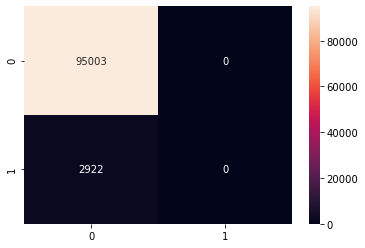

In [30]:
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

**Naive Bayes**
Assumes independence among features.

In [31]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [32]:
gauss_predicted = gaussian.predict(X_test)

In [33]:
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

[[79371 15632]
 [ 1656  1266]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     95003
           1       0.07      0.43      0.13      2922

    accuracy                           0.82     97925
   macro avg       0.53      0.63      0.51     97925
weighted avg       0.95      0.82      0.88     97925



Naive bayes gives an accuracy in terms of f1-measure of 82%. Recall for positive class of 43%. Better than in other models.

Gaussian Score: 
 82.38
Gaussian Test Score: 
 82.35
Accuracy: 
 0.8234567270870564
[[79371 15632]
 [ 1656  1266]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     95003
           1       0.07      0.43      0.13      2922

    accuracy                           0.82     97925
   macro avg       0.53      0.63      0.51     97925
weighted avg       0.95      0.82      0.88     97925



<AxesSubplot:>

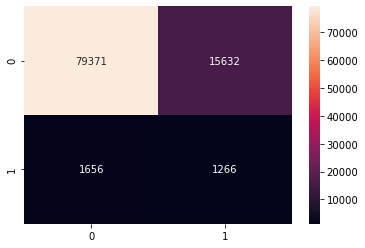

In [34]:
gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d") 


**Rete neurale**

In [35]:
clf = MLPClassifier(hidden_layer_sizes=(6,5), max_iter=300, activation = 'relu',
                    solver='adam', random_state=5, verbose=True,
                    learning_rate_init=0.01)
clf.fit(X_train,y_train)

Iteration 1, loss = 0.14202854
Iteration 2, loss = 0.12180487
Iteration 3, loss = 0.12095878
Iteration 4, loss = 0.12048963
Iteration 5, loss = 0.12036801
Iteration 6, loss = 0.11994378
Iteration 7, loss = 0.11923686
Iteration 8, loss = 0.11962659
Iteration 9, loss = 0.11929066
Iteration 10, loss = 0.11908124
Iteration 11, loss = 0.11864431
Iteration 12, loss = 0.11840491
Iteration 13, loss = 0.11848759
Iteration 14, loss = 0.11833621
Iteration 15, loss = 0.11787201
Iteration 16, loss = 0.11757909
Iteration 17, loss = 0.11747378
Iteration 18, loss = 0.11775258
Iteration 19, loss = 0.11730697
Iteration 20, loss = 0.11681041
Iteration 21, loss = 0.11779991
Iteration 22, loss = 0.11631507
Iteration 23, loss = 0.11711640
Iteration 24, loss = 0.11663425
Iteration 25, loss = 0.11684964
Iteration 26, loss = 0.11671417
Iteration 27, loss = 0.11669025
Iteration 28, loss = 0.11621583
Iteration 29, loss = 0.11620747
Iteration 30, loss = 0.11665301
Iteration 31, loss = 0.11634362
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01, max_iter=300,
              random_state=5, verbose=True)

In [36]:
y_pred_clf=clf.predict(X_test)

In [37]:
print(confusion_matrix(y_test,y_pred_clf))
print(classification_report(y_test,y_pred_clf)) 

[[95003     0]
 [ 2922     0]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     95003
           1       0.00      0.00      0.00      2922

    accuracy                           0.97     97925
   macro avg       0.49      0.50      0.49     97925
weighted avg       0.94      0.97      0.96     97925



C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Random Forest** 

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

Random Forest Score: 
 99.96
Random Forest Test Score: 
 96.99
[[94967    36]
 [ 2912    10]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     95003
           1       0.22      0.00      0.01      2922

    accuracy                           0.97     97925
   macro avg       0.59      0.50      0.50     97925
weighted avg       0.95      0.97      0.96     97925



The random forest has 100% recall for the negative class. From the confusion matrix we note that 8 positives were correctly classified.

# Quantile method



In [39]:
data2 = pd.concat([X_test,y_test],axis=1,join='inner') 
data2['P_1'] = random_forest.predict_proba(X_test)[:,1] #calcola la probabilita che il dato cade e' classificato come churn
data2.sort_values('P_1', inplace=True)
data2.head() 

,how_many_ok_urls,how_many_ko_urls,os_android,os_ios,os_linux,os_other,os_windows,browser_chrome,browser_firefox,browser_opera,...,categories_science,categories_shopping,categories_society,categories_sports,categories_styleandfashion,categories_technologyandcomputing,categories_travel,categories_uncategorized,Pdisc,P_1
199773,24,8,0,0,0,1,0,0,0,0,...,0.008142,0.0,0.018333,0.080833,0.0,0.015833,0.0,0.041667,0,0.0
105821,4,0,0,0,0,1,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.430000,0.0,0.000000,0,0.0
275074,13,0,0,0,0,1,0,0,0,0,...,0.000000,0.0,0.000000,0.041538,0.0,0.087692,0.0,0.000000,0,0.0
313162,3,0,0,0,0,1,0,0,0,0,...,0.000000,0.0,0.000000,0.053333,0.0,0.000000,0.0,0.000000,0,0.0
226939,4,0,0,0,0,1,0,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.0,0.380000,0.0,0.000000,0,0.0


In [40]:
from scipy import stats
deciles = stats.scoreatpercentile(data2['P_1'], np.arange(20, 101, 20))
print('Decile:', deciles)

Decile: [0.    0.01  0.02  0.045 0.81 ]


In [41]:
i = round(len(X_test)/5) # i = 19585 observations x group
mean_1 = data2[0:2*i]['Pdisc'].mean()
mean_2 = data2[2*i+1:3*i]['Pdisc'].mean()
mean_3 = data2[3*i+1:4*i]['Pdisc'].mean()
mean_4 = data2[4*i+1:]['Pdisc'].mean()

means = [mean_1, mean_2, mean_3, mean_4]
print(means) #how many churners in each group 

[0.014449834056676028, 0.0181781045751634, 0.0221609477124183, 0.07996323529411764]


In [42]:
from numpy.ma.core import zeros #for visualization
yDec = zeros(4)
yErrDec = zeros(4)

for i in range(0,4):
  yDec[i] = (deciles[i]+deciles[i+1])/2
  yErrDec[i] = (deciles[i+1]-deciles[i])/2

In [43]:
print(yDec, yErrDec)

[0.005  0.015  0.0325 0.4275] [0.005  0.005  0.0125 0.3825]


In [44]:
xval = [0,1,2,3]

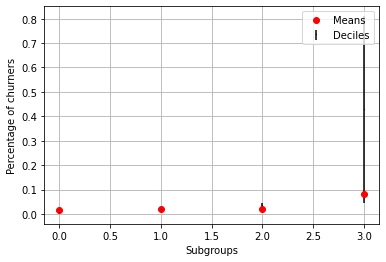

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(visible = True)
ax.errorbar(xval, yDec, yerr=yErrDec, fmt='k,') #intervalli di probabilita' predette dal mio modello
ax.plot(means, 'ro') #percentuale di churners dal test set
ax.set_ylabel("Percentage of churners")
ax.set_xlabel("Subgroups")
ax.legend(['Means','Deciles'])  

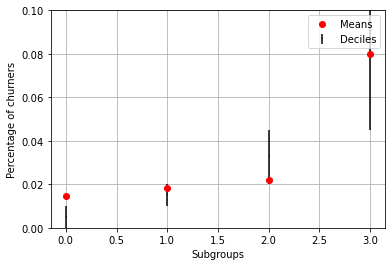

In [46]:
#ZOOM
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid(visible = True)
ax.errorbar(xval, yDec, yerr=yErrDec, fmt='k,') #probability range
ax.plot(means, 'ro') 
ax.set_ylim([0, 0.1])
ax.set_ylabel("Percentage of churners")
ax.set_xlabel("Subgroups")
ax.legend(['Means','Deciles']) 

**Model evalution**

In [47]:
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Score,Test Score
0,Logistic Regression,97.03,97.02
2,Random Forest,99.96,96.99
1,Gaussian Naive Bayes,82.38,82.35


# K-Folds
It is a statistical technique that can be used when there is a good observed sample numerosity. Specifically, so-called k-fold cross-validation consists of dividing the total data set into k parts of equal numerosity, and at each step, the kª part of the data set comes to be the validation part, while the remaining part always constitutes the training set. Thus one trains the model for each of the k parts, thus avoiding problems of overfitting, but also of asymmetric sampling (and thus suffering from bias) of the observed sample, which is typical of splitting the data into only two parts (i.e., training/validation). In other words, one splits the observed sample into groups of equal numerosity, iteratively excludes one group at a time and tries to predict it with the non-excluded groups in order to check the goodness-of-fit of the prediction model used.

In [48]:
df_normal = pd.read_csv(r'C:\Users\Simone\Documents\Desktop\Università-Bicocca\DS LAB-28\df_project\normalizzato_senza_dup')
df_normal = df_normal.drop('external_id',axis = 1)



In [49]:
X = df_normal.drop(["Pdisc"], axis=1, inplace= False)
y = df_normal["Pdisc"]


In [50]:
kf = StratifiedKFold(n_splits=3)

**Logistic Regression**

In [51]:
logreg = LogisticRegression(max_iter=3000)
n=0

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  logreg.fit(X_train, y_train)
  log_predicted= logreg.predict(X_test)

  logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
  logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
  #Equation coefficient and Intercept
  print('########################## TENTATIVO', n, '##########################')
  print('Logistic Regression Training Score: \n', logreg_score)
  print('Logistic Regression Test Score: \n', logreg_score_test)
  print('Coefficient: \n', logreg.coef_)
  print('Intercept: \n', logreg.intercept_)
  print('Accuracy: \n', accuracy_score(y_test,log_predicted))
  print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
  print('Classification Report: \n', classification_report(y_test,log_predicted))

  n+=1

########################## TENTATIVO 0 ##########################
Logistic Regression Training Score: 
 97.03
Logistic Regression Test Score: 
 97.03
Coefficient: 
 [[-3.24424573e-01 -1.58049131e-01 -1.45329994e-01 -2.76985367e-01
  -2.05911086e-01  6.59310831e-02 -4.36834471e-01 -9.63096072e-02
  -6.26799000e-01 -9.56491361e-02  7.89609808e-02 -5.16087078e-01
  -5.39379826e-01 -8.55014955e-01 -5.54729971e-01 -2.14938378e-01
  -1.21561106e+00 -3.61568255e-01 -1.20800224e+00 -1.46040063e-01
   3.34234672e-01  4.88930046e-01  8.58969138e-01 -4.61299926e-01
  -8.72753011e-02 -1.06982290e-01 -3.90078019e-02 -1.94255392e-01
  -1.51125731e-01 -2.30361146e-01 -2.07980575e-01 -9.37119133e-02
  -3.96737336e-02  1.18382847e-01  8.27803996e-03  9.15139007e-02
  -2.95167503e-02  8.62622507e-02 -4.50236442e-01 -7.65857616e-02
   1.55007675e-02  1.34196652e-04 -8.84652833e-05  4.98588331e-01
   9.13114379e-02  1.83336099e-01  1.46261788e-01 -1.28802545e-01
   2.04489903e-02  6.84129069e-01 -4.585420

C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    105572
           1       0.00      0.00      0.00      3233

    accuracy                           0.97    108805
   macro avg       0.49      0.50      0.49    108805
weighted avg       0.94      0.97      0.96    108805

########################## TENTATIVO 1 ##########################
Logistic Regression Training Score: 
 97.03
Logistic Regression Test Score: 
 97.03
Coefficient: 
 [[-4.63069122e-01 -2.79076766e-01  1.11530285e-01 -2.39031448e-01
  -2.77299105e-01  4.27081111e-02 -4.23197337e-01 -8.35706504e-02
  -2.40221825e-01 -3.63043137e-01 -7.96213163e-02 -5.36206145e-01
  -5.32140516e-01 -8.62859991e-01 -6.16395084e-01 -2.18446422e-01
  -1.20186824e+00 -3.72027149e-01 -1.25136385e+00 -1.09976456e-01
   4.26140141e-01  5.94798919e-01  3.52642880e-01 -4.15809815e-01
  -8.58880722e-02 -4.52498409e-02 -7.78087420e-02 -2.41179681e-01
  -2.18000593e-01 -2.

C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    105572
           1       0.00      0.00      0.00      3233

    accuracy                           0.97    108805
   macro avg       0.49      0.50      0.49    108805
weighted avg       0.94      0.97      0.96    108805

########################## TENTATIVO 2 ##########################
Logistic Regression Training Score: 
 97.03
Logistic Regression Test Score: 
 97.03
Coefficient: 
 [[ 8.37234530e-02 -6.35468001e-01  2.40358150e-01 -4.78942152e-01
  -1.36045876e-01 -1.43813909e-01 -5.64254444e-01 -1.72219873e-01
  -4.04611812e-01  2.00158726e-01  1.58366887e-01 -5.22483509e-01
  -5.11239197e-01 -8.67953641e-01 -5.95569363e-01 -2.55177379e-01
  -9.99916433e-01 -3.65775600e-01 -1.08313875e+00 -1.30740347e-01
   4.54430599e-01  4.94825062e-01  8.71709763e-01 -2.83965172e-01
  -7.96386489e-02 -1.64457748e-01 -1.14912033e-01 -9.89721733e-02
  -1.42367220e-01 -1.

C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Simone\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Naive Bayes**

In [52]:
n=0

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  gaussian = GaussianNB()
  gaussian.fit(X_train, y_train)
  #Predict Output
  gauss_predicted = gaussian.predict(X_test)

  gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
  gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
  print('########################## TENTATIVO', n, '##########################')
  print('Gaussian Score: \n', gauss_score)
  print('Gaussian Test Score: \n', gauss_score_test)
  print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
  print(confusion_matrix(y_test,gauss_predicted))
  print(classification_report(y_test,gauss_predicted))

  n+=1

########################## TENTATIVO 0 ##########################
Gaussian Score: 
 78.98
Gaussian Test Score: 
 78.91
Accuracy: 
 0.7891457194062773
[[84416 21156]
 [ 1786  1447]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88    105572
           1       0.06      0.45      0.11      3233

    accuracy                           0.79    108805
   macro avg       0.52      0.62      0.50    108805
weighted avg       0.95      0.79      0.86    108805

########################## TENTATIVO 1 ##########################
Gaussian Score: 
 82.48
Gaussian Test Score: 
 82.51
Accuracy: 
 0.8251275217131566
[[88417 17155]
 [ 1872  1361]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90    105572
           1       0.07      0.42      0.13      3233

    accuracy                           0.83    108805
   macro avg       0.53      0.63      0.51    108805
weighted avg       0.95      0.83      

**Random Forest**


In [53]:
n=0

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]
  random_forest = RandomForestClassifier(n_estimators=100)
  random_forest.fit(X_train, y_train)
  #Predict Output
  rf_predicted = random_forest.predict(X_test)

  random_forest_score = round(random_forest.score(X_train, y_train) * 100, 2)
  random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
  print('########################## TENTATIVO', n, '##########################')
  print('Random Forest Score: \n', random_forest_score)
  print('Random Forest Test Score: \n', random_forest_score_test)
  print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
  print(confusion_matrix(y_test,rf_predicted))
  print(classification_report(y_test,rf_predicted))

  n+=1

########################## TENTATIVO 0 ##########################
Random Forest Score: 
 99.97
Random Forest Test Score: 
 96.99
Accuracy: 
 0.9698818988097974
[[105521     51]
 [  3226      7]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    105572
           1       0.12      0.00      0.00      3233

    accuracy                           0.97    108805
   macro avg       0.55      0.50      0.49    108805
weighted avg       0.95      0.97      0.96    108805

########################## TENTATIVO 1 ##########################
Random Forest Score: 
 99.96
Random Forest Test Score: 
 97.01
Accuracy: 
 0.9700565231377235
[[105536     36]
 [  3222     11]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    105572
           1       0.23      0.00      0.01      3233

    accuracy                           0.97    108805
   macro avg       0.60      0.50      0.50    108805
weighted av

**Reti Neurali**

In [54]:
n=0

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

  # Fit data onto the model
  clf.fit(X_train,y_train)

  ypred=clf.predict(X_test)

  # Calcuate accuracy
  print('Accuracy:', accuracy_score(y_test,ypred))

  n+=1

Iteration 1, loss = 0.15608864
Iteration 2, loss = 0.12308546
Iteration 3, loss = 0.12254507
Iteration 4, loss = 0.12244132
Iteration 5, loss = 0.12165593
Iteration 6, loss = 0.12206444
Iteration 7, loss = 0.12175832
Iteration 8, loss = 0.12040615
Iteration 9, loss = 0.11908756
Iteration 10, loss = 0.11950070
Iteration 11, loss = 0.11870572
Iteration 12, loss = 0.11847414
Iteration 13, loss = 0.11825457
Iteration 14, loss = 0.11862140
Iteration 15, loss = 0.11831310
Iteration 16, loss = 0.11798672
Iteration 17, loss = 0.11875212
Iteration 18, loss = 0.11823246
Iteration 19, loss = 0.11823074
Iteration 20, loss = 0.11822628
Iteration 21, loss = 0.11810012
Iteration 22, loss = 0.11818574
Iteration 23, loss = 0.11754312
Iteration 24, loss = 0.11786849
Iteration 25, loss = 0.11811225
Iteration 26, loss = 0.11752203
Iteration 27, loss = 0.11753788
Iteration 28, loss = 0.11817708
Iteration 29, loss = 0.11755261
Iteration 30, loss = 0.11783006
Iteration 31, loss = 0.11776412
Iteration 32, los

**SVM**

In [ ]:
n=0

for train_index, test_index in kf.split(X,y):
  X_train, X_test = X.loc[train_index], X.loc[test_index]
  y_train, y_test = y.loc[train_index], y.loc[test_index]

  svclassifier = SVC(kernel='linear')
  svclassifier.fit(X_train, y_train)

  y_pred = svclassifier.predict(X_test)

  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

  n+=1

# Feature selection
It is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables both to reduce the computational cost of modeling and, in some cases, to improve model performance.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Progetto DS LAB/normalizzato_senza_dup')
X = data.drop(["Pdisc"], axis=1, inplace= False)
y = data["Pdisc"]
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

In [ ]:
bestfeatures = SelectKBest( )
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
univariataselection= print(featureScores.nlargest(15,'Score'))  #print all the features
univariataselection

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

# Undersampling
It is a technique for balancing unbalanced data sets by keeping all the data in the minority class and decreasing the size of the majority class. It is one of several techniques that data scientists can use to extract more accurate information from originally unbalanced data sets.


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Progetto DS LAB/normalizzato_senza_dup')
X = data.drop(["Pdisc"], axis=1, inplace= False)
y= data["Pdisc"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
rus = RandomUnderSampler(random_state=42) #equal size
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_rus))

In [ ]:
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.30, random_state=101)
print (X_rus_train.shape)
print (y_rus_train.shape)
print (X_test.shape)
print (y_test.shape)

**Logistic Regression**

In [ ]:
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_rus_train, y_rus_train)
#Predict Output
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_rus_train, y_rus_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

**Naive Bayes**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_rus_train, y_rus_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)
gauss_score = round(gaussian.score(X_rus_train, y_rus_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

**Random Forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_rus_train, y_rus_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_rus_train, y_rus_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

**Multi Layer Perceptron**

In [ ]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_rus_train,y_rus_train)

**Support Vector Machines**

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_rus_train, y_rus_train)
y_train = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_train))
print(classification_report(y_test,y_train))

# Oversampling
The process of sampling a signal at a sampling rate significantly above the Nyquist frequency. In theory, a bandwidth-limited signal can be reconstructed perfectly if sampled at or above the Nyquist frequency. Nyquist frequency is defined as twice the bandwidth of the signal. Oversampling can improve resolution and signal-to-noise ratio and can be useful in avoiding aliasing and phase distortion, reducing the performance requirements of anti-aliasing filters.

A signal is said to be oversampled by a factor of N if it is sampled at N times the Nyquist frequency.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)


In [ ]:
X_resampledS, y_resampledS = SMOTE().fit_resample(X_train, y_train) #smote -> equal sampling
print(sorted(Counter(y_resampledS).items()))

**Logistic Regression**

In [ ]:
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_resampledS, y_resampledS)
#Predict Output
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_resampledS, y_resampledS) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

**Naive Bayes**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_resampledS, y_resampledS)
#Predict Output
gauss_predicted = gaussian.predict(X_test)

In [ ]:
gauss_score = round(gaussian.score(X_resampledS, y_resampledS) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

**Random Forest**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_resampledS, y_resampledS)
#Predict Output
rf_predicted = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_resampledS, y_resampledS) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

**Multi Layer Perceptron**

In [ ]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_resampledS,y_resampledS)
# Make prediction on test dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score

# Calcuate accuracy
accuracy_score(y_test,ypred)

**SVM**

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_resampledS, y_resampledS)
y_predict = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

# Feature selection + Undersampling
We choose the cariables obtained from the feature and apply undersampling.

In [ ]:
X = normalizzato[["FLG_MYSKYHD", "SPORT", "FLG_SKY_ON_DEMAND", "CINEMA", "SKY_FAMIGLIA", "STB_MYSKYHD", "STB_HD", "CALCIO", "FLG_MV", "FLG_MYSKY", "FLG_HD"]]
y = normalizzato["Pdisc"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
rus = RandomUnderSampler(random_state=42) #equal size
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_rus))

In [ ]:
X_rus_train, X_rus_test, y_rus_train, y_rus_test = train_test_split(X_rus, y_rus, test_size=0.30, random_state=101)
print (X_rus_train.shape)
print (y_rus_train.shape)
print (X_test.shape)
print (y_test.shape)

**Logistic Regression**

In [ ]:
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_rus_train, y_rus_train)
#Predict Output
log_predicted= logreg.predict(X_test)
logreg_score = round(logreg.score(X_rus_train, y_rus_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

**Naive Bayes**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_rus_train, y_rus_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)
gauss_score = round(gaussian.score(X_rus_train, y_rus_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

**Random Forests**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_rus_train, y_rus_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_rus_train, y_rus_train) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

**Multi Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_rus_train,y_rus_train)

**SVM**

In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_rus_train, y_rus_train)
y_train = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_train))
print(classification_report(y_test,y_train))

**Model Evalution**

In [ ]:
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [ 'Logistic Regression', 'Gaussian Naive Bayes','Random Forest'],
    'Score': [ logreg_score, gauss_score, random_forest_score],
    'Test Score': [ logreg_score_test, gauss_score_test, random_forest_score_test]})
models.sort_values(by='Test Score', ascending=False)

# Feature selection + Oversampling


In [ ]:
X = normalizzato[["FLG_MYSKYHD", "SPORT", "FLG_SKY_ON_DEMAND", "CINEMA", "SKY_FAMIGLIA", "STB_MYSKYHD", "STB_HD", "CALCIO", "FLG_MV", "FLG_MYSKY", "FLG_HD"]]
y= normalizzato["Pdisc"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

In [ ]:
X_resampledS, y_resampledS = SMOTE().fit_resample(X_train, y_train) #smote -> equal sampling
print(sorted(Counter(y_resampledS).items()))

**Logistic Regression**

In [ ]:
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_resampledS, y_resampledS)
#Predict Output
log_predicted= logreg.predict(X_test)

In [ ]:
logreg_score = round(logreg.score(X_resampledS, y_resampledS) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)
print('Coefficient: \n', logreg.coef_)
print('Intercept: \n', logreg.intercept_)
print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

**Naive Bayes**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_resampledS, y_resampledS)
#Predict Output
gauss_predicted = gaussian.predict(X_test)
gauss_score = round(gaussian.score(X_resampledS, y_resampledS) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

**Random Forest**


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_resampledS, y_resampledS)
#Predict Output
rf_predicted = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_resampledS, y_resampledS) * 100, 2)
random_forest_score_test = round(random_forest.score(X_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))

**Multi Layer Perceptron**

In [ ]:
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_resampledS,y_resampledS)
ypred=clf.predict(X_test)

# Calcuate accuracy
accuracy_score(y_test,ypred)

**SVM**


In [ ]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_resampledS, y_resampledS)
y_predict = svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

# Curve ROC

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
data_X, cls_lab = make_classification(n_samples=2100, n_classes=2, weights=[1,1], random_state=2)
train_X, test_X, train_y, test_y = train_test_split(data_X, cls_lab, test_size=0.5, random_state=2)

model =RandomForestClassifier()
model.fit(train_X, train_y)

prob = model.predict_proba(test_X)
prob = probs[:, 1]
fper, tper, thresholds = roc_curve(test_y, prob)
plot_roc_curve(fper, tper)